In [1]:
import pandas as pd

In [9]:
df_weather_vladimir = pd.read_csv('weather_vladimir.csv')

In [10]:
from sklearn.preprocessing import LabelEncoder
import json

df_weather_vladimir_encoded = df_weather_vladimir.copy()
label_encoders = {}
codes = {}

# Encode each categorical feature
for column in df_weather_vladimir_encoded.columns:
    le = LabelEncoder()
    df_weather_vladimir_encoded[column] = le.fit_transform(df_weather_vladimir_encoded[column])
    
    # Store the mapping of original values to encoded values
    codes[column] = {value: code for value, code in zip(le.classes_, le.transform(le.classes_))}
    label_encoders[column] = le  # Store the encoder if needed later


In [11]:
df_weather_vladimir_encoded

,ymdp,temp,press,hum,main,prec,wind_dir,wind_speed,real_feel,moon_rise,moon_percent,sunrise_hour,sunrise_minute,sunset_hour,sunset_minute,vision_km
0,0,35,44,75,3,0,6,4,32,4,31,4,25,9,38,85
1,1,35,44,74,3,0,6,4,32,4,31,4,25,9,38,85
2,2,38,43,66,3,1,7,4,32,4,31,4,25,9,38,85
3,3,37,42,70,3,0,7,3,32,4,31,4,25,9,38,85
4,4,36,40,72,3,0,7,4,33,4,21,4,27,9,35,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,9007,31,23,68,3,0,1,5,28,0,47,6,55,4,60,86
9008,9008,29,26,68,3,0,1,5,23,0,47,6,56,7,60,86
9009,9009,28,29,71,3,0,1,4,23,0,47,6,56,7,60,86
9010,9010,29,27,72,3,0,7,4,23,0,47,6,56,7,60,86


  0%|          | 0/16 [00:00<?, ?it/s]

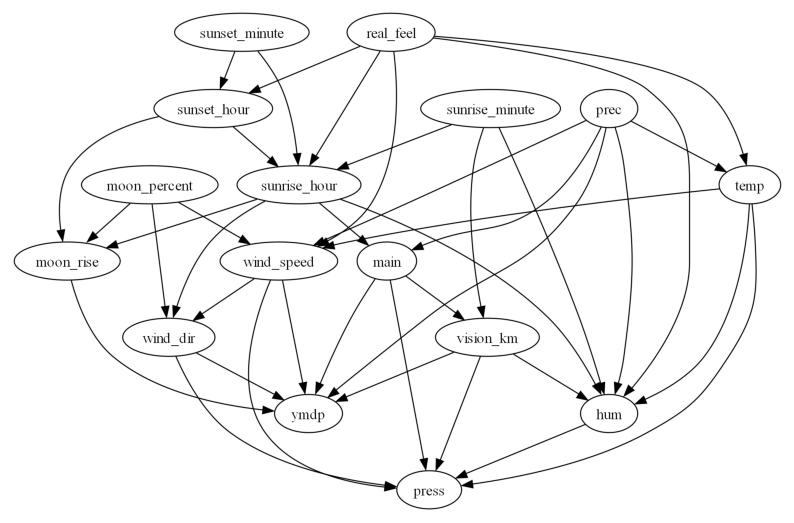

In [13]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.cit import fisherz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data = df_weather_vladimir_encoded.values  # Convert DataFrame to NumPy array
cg = pc(data, alpha=0.05, indep_test=fisherz)  # Specify alpha and independence test

pdy = GraphUtils.to_pydot(cg.G, labels=df_weather_vladimir_encoded.columns.to_list())
pdy.write_png('causal_graph.png')

img = mpimg.imread('causal_graph.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()